In [53]:
# prompt: Import and Clean Country-data from file to google colab

import pandas as pd
from google.colab import drive

drive.mount('/content/drive')

# Load the data from the Google Drive
data = pd.read_csv('Country-data.csv',sep = ",")

# Clean the data
data.dropna(inplace=True)  # Drop missing values
data.drop_duplicates(inplace=True)  # Drop duplicate rows


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [46]:
data.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [55]:
names = data["country"]
X = data.drop(["country"],axis = 1)

In [56]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 1.) Fit a kmeans Model with any Number of Clusters

In [57]:
kmeans = KMeans(n_clusters=3, random_state=42).fit(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# 2.) Pick two features to visualize across

In [58]:
X.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

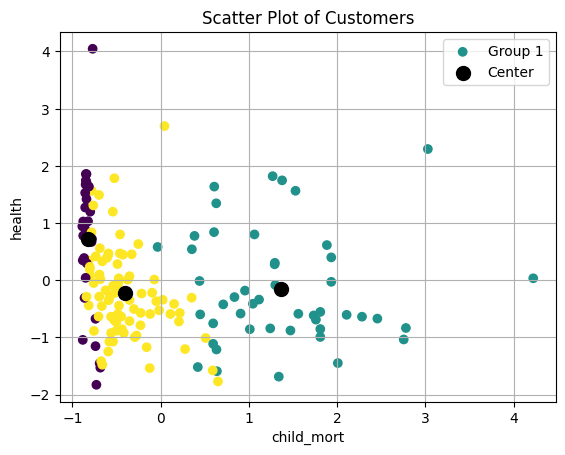

In [59]:
# 使用matplotlib库绘制散点图，以可视化聚类算法（如K-means）的结果

# 要在散点图中展示的两个特征的索引
x1_index = 0
x2_index = 2

# 绘制散点图
plt.scatter(X_scaled[:, x1_index], X_scaled[:, x2_index], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, x1_index], kmeans.cluster_centers_[:, x2_index], marker='o', color='black', s=100)

plt.xlabel(X.columns[x1_index])
plt.ylabel(X.columns[x2_index])
plt.title('Scatter Plot of Customers')
plt.legend(["Group 1", "Center", "Group 2"])
plt.grid()
plt.show()


# 3.) Check a range of k-clusters and visualize to find the elbow. Test 30 different random starting places for the centroid means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

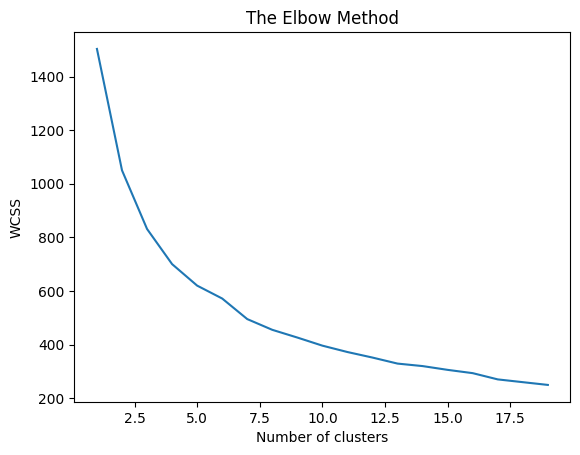

In [60]:
# 使用“肘部法则”（Elbow Method）来确定K-means聚类算法中最优的聚类数量（即K值）

# 初始化空列表
# 创建了一个空列表WCSSs，用于存储每个不同K值对应的聚类内误差平方和（WCSS，Within-Cluster Sum of Squares）
WCSSs = []

# 设定K值范围: 尝试从1到19个聚类中心来运行K-means算法，并评估每个情况下的WCSS
Ks = range(1,20)

# 循环遍历了从1到19的每个K值
for k in Ks:
  # 应用K-means聚类
  # 在循环内部，为每个K值创建了一个KMeans实例
  # n_clusters=k设置了聚类中心的数量，init='k-means++'是一种智能选择初始聚类中心的方法，以加速算法的收敛，random_state=42确保了结果的可重复性
  kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = 42)
  kmeans.fit(X_scaled) # 使用标准化后的特征数据X_scaled训练K-means模型
  WCSSs.append(kmeans.inertia_) # 计算了每个K值对应的WCSS，并将其添加到WCSSs列表中
  # WCSS是聚类内样本到其最近的聚类中心的距离的平方和，它是衡量聚类性能的一个指标，WCSS越小,表示聚类效果越好。

plt.plot(Ks, WCSSs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


“肘部法则”是一种启发式的方法，用于寻找K-means聚类中最佳的K值。随着K值的增加，WCSS会减小，因为样本会更靠近它们的聚类中心。但是，从某个点开始，增加聚类中心的数量将不会导致显著的WCSS下降。这个点就像肘部一样，表示增加更多的聚类中心不再带来显著的效果改善，因此可以作为最佳聚类数量的指标。

通过观察肘部曲线图，我们可以选择在曲线开始平缓的K值作为最优的聚类数量，以实现聚类效果和计算成本之间的平衡。

# 4.) Use the above work and economic critical thinking to choose a number of clusters. Explain why you chose the number of clusters and fit a model accordingly.

In [61]:
# 使用K-means聚类算法对标准化后的数据X_scaled进行聚类，并选择了4个聚类中心
kmeans_chosen = KMeans(n_clusters=4).fit(X_scaled)
kmeans_chosen

# 根据肘部法则图，WCSS的下降在4个聚类中心时开始变得平缓，这表明增加更多的聚类中心并不会显著改善聚类的内部凝聚度，因此选择4作为聚类数量

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [62]:
print("Cluster Centers: \n", kmeans_chosen.cluster_centers_)

Cluster Centers: 
 [[-0.82860929  0.17262066  0.85918977 -0.29637276  1.46227512 -0.47818851
   1.10764922 -0.76368146  1.66190214]
 [-0.41103452  0.0076087  -0.20315863  0.04911688 -0.21707832 -0.03332883
   0.24812404 -0.43375408 -0.33115921]
 [-0.84900324  4.93567278 -0.00816303  4.54805768  2.4395424  -0.50420614
   1.22682431 -1.03886271  2.44079735]
 [ 1.38209405 -0.44902617 -0.17115749 -0.1972886  -0.69747801  0.40850458
  -1.27706228  1.39559546 -0.60950969]]


# Create a list of the countries that are in each cluster. Write interesting things you notice. Hint : Use .predict(method)

In [63]:
# 将数据点（在这个例子中是国家）根据K-means聚类算法的结果分配到不同的聚类中，并打印出每个聚类包含的国家
# 这有助于理解不同国家在给定特征空间（由X_scaled表示）中的相似性和差异性
# 通过查看每个聚类中的国家，我们可以获得关于数据潜在结构的见解，例如哪些国家在经济指标、人口统计或其他特征上相似

# 预测聚类标签
# 使用训练好的K-means模型kmeans_chosen对标准化后的数据X_scaled进行预测，得到每个数据点（国家）的聚类标签
# cluster_assignments数组中的每个元素对应于X_scaled中每个国家的聚类标签
cluster_assignments = kmeans_chosen.predict(X_scaled)

# 初始化聚类字典
# 创建一个字典clusters，其键是从0到kmeans_chosen.n_clusters-1的字符串（表示聚类的编号），值是空列表，用于存储属于该聚类的国家
clusters = {str(i): [] for i in range(kmeans_chosen.n_clusters)}

# 遍历每个国家和其对应的聚类标签
for i, label in enumerate(cluster_assignments):
    country = data.iloc[i]['country']
    clusters[str(label)].append(country)

# Print the countries in each cluster
for i in range(kmeans_chosen.n_clusters):
    print('Cluster', i+1, ':', clusters[str(i)])

Cluster 1 : ['Australia', 'Austria', 'Belgium', 'Brunei', 'Canada', 'Cyprus', 'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan', 'Kuwait', 'Netherlands', 'New Zealand', 'Norway', 'Portugal', 'Qatar', 'Slovenia', 'South Korea', 'Spain', 'Sweden', 'Switzerland', 'United Arab Emirates', 'United Kingdom', 'United States']
Cluster 2 : ['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belize', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria', 'Cambodia', 'Cape Verde', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Czech Republic', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia', 'Fiji', 'Georgia', 'Grenada', 'Guatemala', 'Guyana', 'Hungary', 'India', 'Indonesia', 'Iran', 'Jamaica', 'Jordan', 'Kazakhstan', 'Kyrgyz Republic', 'Latvia', 'Lebanon', 'Libya', 'Lithuania', 'Macedonia, FYR', 'Malay

From the list of countries, we can see that cluster 1 and cluster 3 are mainly developing countries with relatively low GDP per capita and economics growth. And cluster 2 are mainly developed countries with higher GDP per capita and economic growth. It is hard to analyze cluster 4 since there are only three countries in it.

# 6.) Create a table of Descriptive Statistics. Rows being the Cluster number and columns being all the features. Values being the mean of the centroid. Use the nonscaled X values for interprotation

In [64]:
# 创建并展示一个包含K-means聚类算法确定的聚类中心（质心）的描述性统计表

# 提取聚类中心，centroids是一个数组，其中每一行代表一个聚类中心，每一列代表一个特征
centroids = kmeans_chosen.cluster_centers_

# 从特征数据集X中提取列名（特征名称），存储在colnames中。这些列名将用作描述性统计表的列标题
colnames = X.columns

# 创建描述性统计表，desc_stats展示了每个聚类中心在各特征维度上的坐标值
desc_stats = pd.DataFrame(centroids, columns=colnames)

# 设置行索引，将desc_stats的行索引设置为聚类编号
# 通过列表推导式生成聚类编号的标签（从“Cluster 1”开始），并赋值给desc_stats.index。这样每一行（每个聚类中心）都有了明确的标识。
desc_stats.index = ['Cluster {}'.format(i+1) for i in range(kmeans_chosen.n_clusters)]

# Print the table
print(desc_stats)

           child_mort   exports    health   imports    income  inflation  \
Cluster 1   -0.828609  0.172621  0.859190 -0.296373  1.462275  -0.478189   
Cluster 2   -0.411035  0.007609 -0.203159  0.049117 -0.217078  -0.033329   
Cluster 3   -0.849003  4.935673 -0.008163  4.548058  2.439542  -0.504206   
Cluster 4    1.382094 -0.449026 -0.171157 -0.197289 -0.697478   0.408505   

           life_expec  total_fer      gdpp  
Cluster 1    1.107649  -0.763681  1.661902  
Cluster 2    0.248124  -0.433754 -0.331159  
Cluster 3    1.226824  -1.038863  2.440797  
Cluster 4   -1.277062   1.395595 -0.609510  


# 7.) Write an observation about the descriptive statistics.

Cluster 1 has the lowest health of -0.211, it has moderate export and import indicators. Cluster 2 has a very low children moetality and it has the highest health indicator and a very high income indicator. In addition, the life expectancy for cluster 2 is also very high. Cluster 3 has the highest children mortality, lowest export indicator, GDP and income. However, only cluster 3 has positive inflation rate. Cluster 4 hasthe lowest chilren mortality, highest import and export indicators. It also has the highest income, GDP and life expectancy.